In [2]:
import numpy as np
import skimage as ski
from skimage import io, transform,draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(12,9)
import os
import copy
from IPython.display import clear_output
import compression as comp

#run these if you want to reload imported modules every time the code is run 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
##### make a bunch of blank 250x250 images with black dots in them for testing and training the neural network 
N = 100 # length of compressed projective representation 
d = 150 #dimension of image 
M = int(round(np.sqrt(2*d**2)))# length of uncompressed projective representation
L = 5 # number of projective representations  MUST BE ODD 

if not os.path.isdir('./data'):
    os.mkdir('./data')
if not os.path.isdir('./data/training'):
    os.mkdir('./data/training')
if not os.path.isdir('./data/testing'):
    os.mkdir('./data/testing')
    
S = comp.sensing_matrix(N,M) 
np.save('./data/sensing_matrix.npy',S)

for i in range(5000):

    points = np.random.randint(0,d,(np.random.randint(0,20),2))
    np.save('./data/training/train-uncomp-%04d.npy'%i,points)

    im = np.zeros((d,d),dtype=float)    
    for p in points:
        im[ski.draw.circle(*p,3,shape=im.shape)] = 1.0
    ski.io.imsave('./data/training/train-%04d.jpg'%i,im)
    
    F = comp.project(points,shape=(d,d),L=L,M=M)
    Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix
    np.save('./data/training/train-comp-%04d.npy'%i,Y)  
    
for i in range(500):

    points = np.random.randint(0,d,(np.random.randint(0,20),2))
    np.save('./data/testing/test-uncomp-%04d.npy'%i,points)

    im = np.zeros((d,d),dtype=float)    
    for p in points:
        im[ski.draw.circle(*p,3,shape=im.shape)] = 1.0
    ski.io.imsave('./data/testing/test-%04d.jpg'%i,im)
    
    F = comp.project(points,shape=(d,d),L=L,M=M)
    Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix
    np.save('./data/testing/test-comp-%04d.npy'%i,Y)      


C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0007.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0008.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0011.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0014.jpg is a low contrast image
  warn('%s is a low contrast image' 

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0118.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0121.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0122.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0123.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0124.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0189.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0190.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0191.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0192.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0193.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0286.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0287.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0288.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0290.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0295.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0385.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0386.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0387.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0390.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0392.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0469.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0470.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0471.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0474.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0478.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0548.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0551.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0553.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0559.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0560.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0638.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0639.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0640.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0641.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0642.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0731.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0733.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0736.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0739.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0742.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0815.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0817.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0818.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0819.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0821.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0892.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0895.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0896.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0900.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-0901.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1000.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1001.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1002.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1005.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1006.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1082.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1083.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1085.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1086.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1087.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1157.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1158.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1160.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1161.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1162.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1248.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1251.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1252.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1253.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1254.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1359.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1360.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1362.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1365.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1367.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1454.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1457.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1462.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1465.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1466.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1536.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1538.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1540.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1541.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1544.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1628.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1629.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1631.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1632.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1633.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1726.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1730.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1733.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1734.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1736.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1831.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1832.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1833.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1836.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1837.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1927.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1931.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1935.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1936.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-1939.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2005.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2006.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2010.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2011.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2014.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2108.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2109.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2112.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2115.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2116.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2202.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2206.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2208.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2209.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2213.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2283.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2284.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2285.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2286.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2288.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2369.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2370.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2372.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2373.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2376.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2462.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2469.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2477.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2478.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2481.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2561.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2562.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2564.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2565.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2569.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2653.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2655.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2656.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2660.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2662.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2750.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2751.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2755.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2757.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2758.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2834.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2843.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2847.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2848.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2849.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2923.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2924.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2926.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2928.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-2929.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3004.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3005.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3006.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3010.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3013.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3094.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3095.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3098.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3101.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3102.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3186.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3188.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3189.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3190.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3191.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3294.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3298.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3301.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3303.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3304.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3384.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3385.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3387.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3390.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3393.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3485.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3486.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3490.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3491.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3493.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3576.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3578.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3583.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3585.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3586.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3656.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3657.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3660.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3661.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3663.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3743.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3744.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3751.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3753.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3754.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3832.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3834.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3836.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3837.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3838.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3925.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3926.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3928.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3931.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-3932.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4017.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4018.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4019.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4021.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4022.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4103.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4104.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4108.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4109.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4110.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4196.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4198.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4204.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4205.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4210.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4290.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4291.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4292.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4297.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4299.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4387.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4388.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4391.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4392.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4393.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4468.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4469.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4470.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4471.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4473.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4556.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4558.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4561.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4562.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4568.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4655.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4656.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4658.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4659.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4662.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4742.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4746.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4747.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4748.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4751.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4830.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4835.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4836.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4838.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4841.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4921.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4922.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4924.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4925.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/training/train-4926.jpg is a low contrast image
  warn('%s is a low contrast image' % fn

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0001.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0003.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0004.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0005.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0007.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Us

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0080.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0081.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0084.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0085.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0089.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Us

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0172.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0174.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0176.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0178.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0180.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Us

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0259.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0263.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0264.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0265.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0267.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Us

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0347.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0348.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0349.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0350.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0351.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Us

C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0424.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0425.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0426.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0427.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\worker\Miniconda3\envs\kevintorch-env\lib\site-packages\skimage\io\_io.py:140: UserWarning: ./data/testing/test-0430.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Us

In [4]:
# check that the data encode the positions of the points in the compressed representation 

def check_comp_vs_uncomp(n):
    """ the compressed->uncompressed points are blue plusses
    ground truth is pink circles"""
    im = ski.io.imread('./data/training/train-%04d.jpg'%n)
    pts_u = np.load('./data/training/train-uncomp-%04d.npy'%n)
    pts_c = np.load('./data/training/train-comp-%04d.npy'%n)
    pts_u_ = comp.decompress(pts_c,S,im.shape,L,M)
    im = np.stack((im,)*3,-1)
    for p in pts_u:
        r,c = ski.draw.circle_perimeter(p[0],p[1],5,shape = im.shape)
        im[r,c]=[255,0,255]
    for p in pts_u_:
        im = comp.draw_plus(p,im,col=[0,0,255])
    plt.imshow(im)

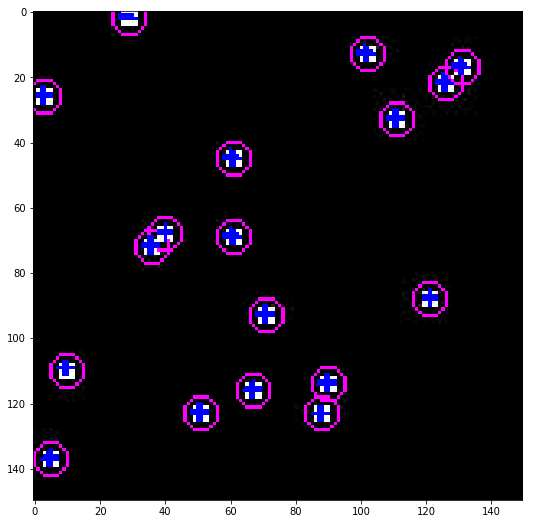

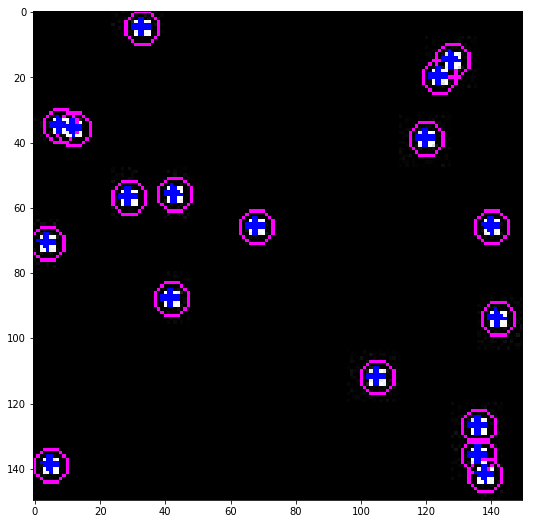

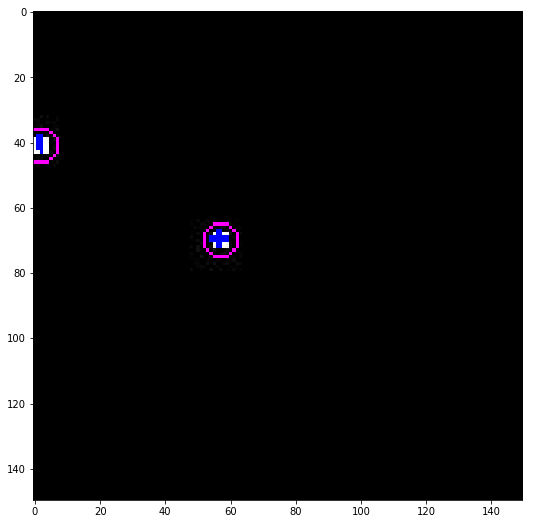

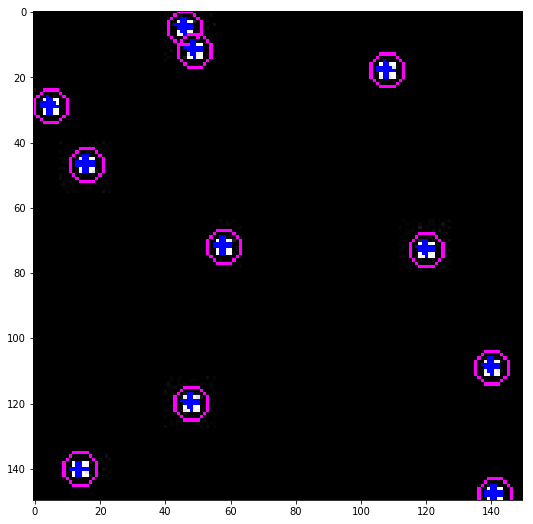

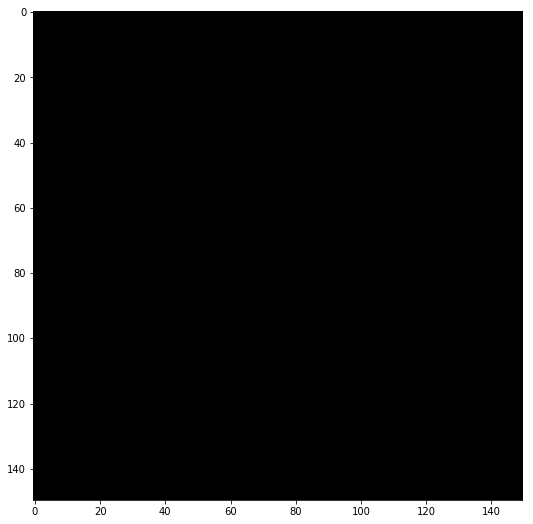

In [10]:
N = np.random.randint(0,5000,size=5)
for n in N:
    check_comp_vs_uncomp(n)
    plt.show()